# `pandas` Part 4: Grouping

# Learning Objective
## By the end of this tutorial you will be able to:
1. Group data with `groupby()`
 

## Files Needed for this lesson: `winemag-data-130k-v2.csv`
>- Download this csv from Canvas prior to the lesson

## The general steps to working with pandas:
1. import pandas as pd
2. Create or load data into a pandas DataFrame or Series
3. Reading data with `pd.read_`
>- Excel files: `pd.read_excel('fileName.xlsx')`
>- Csv files: `pd.read_csv('fileName.csv')`
>- Note: if the file you want to read into your notebook is not in the same folder you can do one of two things:
>>- Move the file you want to read into the same folder/directory as the notebook
>>- Type out the full path into the read function
4. After steps 1-3 you will want to check out your DataFrame
>- Use `shape` to see how many records and columns are in your DataFrame
>- Use `head()` to show the first 5-10 records in your DataFrame

# Analytics Project Framework Notes
## A complete and thorough analytics project will have 3 main areas
1. Descriptive Analytics: tells us what has happened or what is happening. 
>- The focus of this lesson is how to do this in python.
>- Many companies are at this level but not much more than this
>- Descriptive statistics (mean, median, mode, frequencies)
>- Graphical analysis (bar charts, pie charts, histograms, box-plots, etc)
2. Predictive Analytics: tells us what is likely to happen next
>- Less companies are at this level but are slowly getting there
>- Predictive statistics ("machine learning (ML)" using regression, multi-way frequency analysis, etc)
>- Graphical analysis (scatter plots with regression lines, decision trees, etc)
3. Prescriptive Analytics: tells us what to do based on the analysis
>- Synthesis and Report writing: executive summaries, data-based decision making
>- No analysis is complete without a written report with at least an executive summary
>- Communicate results of analysis to both non-technical and technical audiences

# Descriptive Analytics Using `pandas`

# Initial set-up steps
1. import modules and check working directory
2. Read data in
3. Check the data

In [1]:
import pandas as pd
import numpy as np

In [3]:
help(pd.Series.groupby)

Help on function groupby in module pandas.core.series:

groupby(self, by=None, axis=0, level=None, as_index: bool = True, sort: bool = True, group_keys: bool = True, squeeze: bool = <object object at 0x00000221ECB637B0>, observed: bool = False, dropna: bool = True) -> 'SeriesGroupBy'
    Group Series using a mapper or by a Series of columns.
    
    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.
    
    Parameters
    ----------
    by : mapping, function, label, or list of labels
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        aligned; see ``.align()`` method). If an ndarray is pass

In [4]:
help(pd.Series.loc)

Help on property:

    Access a group of rows and columns by label(s) or a boolean array.
    
    ``.loc[]`` is primarily label based, but may also be used with a
    boolean array.
    
    Allowed inputs are:
    
    - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
      interpreted as a *label* of the index, and **never** as an
      integer position along the index).
    - A list or array of labels, e.g. ``['a', 'b', 'c']``.
    - A slice object with labels, e.g. ``'a':'f'``.
    
      .. warning:: Note that contrary to usual python slices, **both** the
          start and the stop are included
    
    - A boolean array of the same length as the axis being sliced,
      e.g. ``[True, False, True]``.
    - A ``callable`` function with one argument (the calling Series or
      DataFrame) and that returns valid output for indexing (one of the above)
    
    See more at :ref:`Selection by Label <indexing.label>`
    
    Raises
    ------
    KeyError
        If any it

# Step 2 Read Data Into a DataFrame with `read_csv()`
>- file name: `winemag-data-130k-v2.csv`
>- Set the index to column 0

In [5]:
wine=pd.read_csv('winemag-data-130k-v2.csv')
wineDF=wine.set_index(wine.columns[0])
wineDF

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
Unnamed: 0,,,,,,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser


In [6]:
wine

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


### Check how many rows, columns, and data points are in the `wine_reviews` DataFrame
>- Use `shape` and indices to define variables
>- We can store the values for rows and columns in variables if we want to access them later

In [6]:
row_col=wine.shape
wineDF.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [7]:
wineDF.describe(include='O')
#shows all non numeric datatypes

,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,129908,129971,92506,129908,108724,50511,103727,98758,129971,129970,129971
unique,43,119955,37976,425,1229,17,19,15,118840,707,16757
top,US,This zesty red has pretty aromas that suggest ...,Reserve,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,2009,36247,4480,11065,25514,25514,11,13272,222


In [8]:
wine.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


### Check a couple of rows of data

In [18]:
wineDF

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
Unnamed: 0,,,,,,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser


# Descriptive Analytics with `groupby()`
>- General syntax: dataFrame.groupby(['fields to group by'])[fieldsToanalyze].aggregation

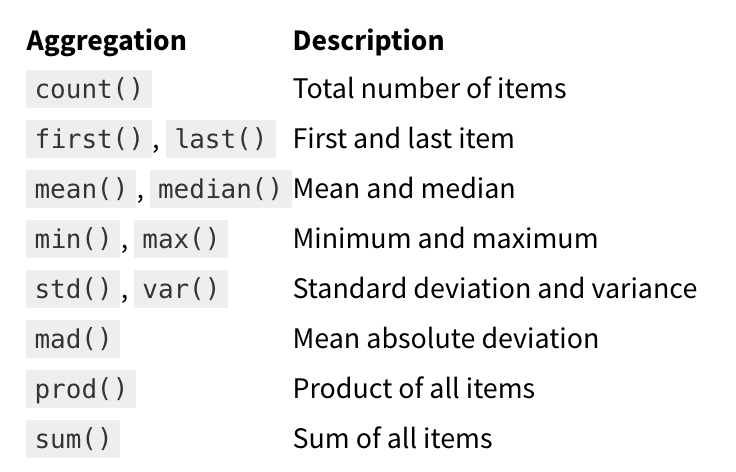

### Now, what is/are the question(s) being asked of the data? 
>- All analytics projects start with questions (from you, your boss, some decision maker, etc)
>- More aggregation function specs found here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html

###  How many wines have been rated at each point value?

In [11]:
wineDF.groupby(['points'])['title'].count()

points
80       397
81       692
82      1836
83      3025
84      6480
85      9530
86     12600
87     16933
88     17207
89     12226
90     15410
91     11359
92      9613
93      6489
94      3758
95      1535
96       523
97       229
98        77
99        33
100       19
Name: title, dtype: int64

### How much does the least expensive wine for each point rating cost? 

In [12]:
wineDF.groupby(['points'])['price'].min()

points
80      5.0
81      5.0
82      4.0
83      4.0
84      4.0
85      4.0
86      4.0
87      5.0
88      6.0
89      7.0
90      8.0
91      7.0
92     11.0
93     12.0
94     13.0
95     20.0
96     20.0
97     35.0
98     50.0
99     44.0
100    80.0
Name: price, dtype: float64

### Question: How much does the most expensive wine for each point rating cost?

In [16]:
wineDF.groupby(['points'])['price'].max()

points
80       69.0
81      130.0
82      150.0
83      225.0
84      225.0
85      320.0
86      170.0
87      800.0
88     3300.0
89      500.0
90      510.0
91     2013.0
92      750.0
93      770.0
94     1125.0
95      973.0
96     2500.0
97     2000.0
98     1900.0
99      850.0
100    1500.0
Name: price, dtype: float64

### What is the overall maximum price for all wines?

In [17]:
wine['price'].max()

3300.0

### What is the lowest price for a wine rating of 100?

In [18]:
wineDF[wineDF['points']==100].agg({'price':min})

price    80.0
dtype: float64

In [19]:
wine.loc[(wine['points']==100),'price'].min()

80.0

### What is the highest price for a wine rating of 80? 

In [20]:
wineDF.loc[(wineDF['points']==80),'price'].max()

69.0

### What is the maximum rating for each country? 

In [22]:
wineDF.groupby(['country'])['points'].max()

country
Argentina                  97
Armenia                    88
Australia                 100
Austria                    98
Bosnia and Herzegovina     88
Brazil                     89
Bulgaria                   91
Canada                     94
Chile                      95
China                      89
Croatia                    91
Cyprus                     89
Czech Republic             89
Egypt                      84
England                    95
France                    100
Georgia                    92
Germany                    98
Greece                     93
Hungary                    97
India                      93
Israel                     94
Italy                     100
Lebanon                    91
Luxembourg                 90
Macedonia                  89
Mexico                     92
Moldova                    91
Morocco                    93
New Zealand                95
Peru                       86
Portugal                  100
Romania                    92
Se

### What is the maximum rating for China?

In [23]:
wine.loc[(wine['country']=='China'),'points'].max()

89

### What are some summary stats for price for each country? 
>- Using the `agg()` function for specific summary stats
>>- What is the sample size?
>>- What is the minimum?
>>- What is the maximum?
>>- What is the mean?
>>- What is the median?
>>- What is the standard deviation? 

In [24]:
wineDF.groupby('country')['price'].agg(['count','min','max','median','std'])

,count,min,max,median,std
country,,,,,
Argentina,3756,4.0,230.0,17.0,23.430122
Armenia,2,14.0,15.0,14.5,0.707107
Australia,2294,5.0,850.0,21.0,49.049458
Austria,2799,7.0,1100.0,25.0,27.224797
Bosnia and Herzegovina,2,12.0,13.0,12.5,0.707107
Brazil,47,10.0,60.0,20.0,11.053649
Bulgaria,141,8.0,100.0,13.0,9.508744
Canada,254,12.0,120.0,30.0,19.658148
Chile,4416,5.0,400.0,15.0,21.929371


## What are the descriptive analytics for country and province? 
>- We can group by multiple fields by adding more to our groupby() function

In [33]:
(wineDF.groupby(['country','province'])).describe()
# grouped by country and province--make sure to use wine DF with the reset index.

points                                          \
                             count       mean       std   min    25%   50%   
country   province                                                           
Argentina Mendoza Province  3264.0  86.826593  3.233570  80.0  84.00  87.0   
          Other              536.0  86.001866  2.726470  80.0  84.00  86.0   
Armenia   Armenia              2.0  87.500000  0.707107  87.0  87.25  87.5   
Australia Australia Other    245.0  85.518367  2.194598  80.0  84.00  85.0   
          New South Wales     85.0  87.694118  2.600474  82.0  86.00  88.0   
...                            ...        ...       ...   ...    ...   ...   
Uruguay   Juanico             12.0  86.333333  3.498918  80.0  83.50  87.0   
          Montevideo          11.0  88.272727  2.493628  83.0  87.00  88.0   
          Progreso            11.0  86.818182  2.182576  82.0  86.50  87.0   
          San Jose             3.0  84.000000  2.645751  82.0  82.50  83.0   
          Uruguay             24.0  86.833333  2.713359  81.0  85.00  87.0   

                                          price                              \
                              75%   max   count       mean        std   min   
country   province                                                            
Argentina Mendoza Province  89.00  97.0  3226.0  25.053317  24.044538   4.0   
          Other             88.00  95.0   530.0  21.203774  18.958615   7.0   
Armenia   Armenia           87.75  88.0     2.0  14.500000   0.707107  14.0   
Australia Australia Other   87.00  93.0   236.0  12.427966   9.548482   5.0   
          New South Wales   90.00  94.0    85.0  25.623529  21.072424   8.0   
...                           ...   ...     ...        ...        ...   ...   
Uruguay   Juanico           89.25  90.0    12.0  48.583333  40.692770  10.0   
          Montevideo        90.50  91.0    11.0  26.090909  12.864327  17.0   
          Progreso          88.00  90.0    11.0  24.272727  13.184012  12.0   
          San Jose          85.00  87.0     3.0  30.000000  17.320508  20.0   
          Uruguay           89.00  91.0    24.0  22.083333   9.040569  12.0   

                                                       
                              25%   50%    75%    max  
country   province                                     
Argentina Mendoza Province  12.00  17.0  26.00  230.0  
          Other             12.00  15.0  20.00  150.0  
Armenia   Armenia           14.25  14.5  14.75   15.0  
Australia Australia Other    9.00  11.0  13.00  130.0  
          New South Wales   13.00  19.0  30.00  125.0  
...                           ...   ...    ...    ...  
Uruguay   Juanico           11.50  45.0  60.00  130.0  
          Montevideo        18.50  22.0  25.00   60.0  
          Progreso          15.00  20.0  31.00   46.0  
          San Jose          20.00  20.0  35.00   50.0  
          Uruguay           16.00  20.0  24.25   50.0  

[425 rows x 16 columns]

## What are the descriptive price analytics for the US?
>- Add `get_group()` syntax

In [29]:
(wineDF.groupby(['country']).get_group('US')).describe() #same thing as above in one line

,points,price
count,54504.00000,54265.000000
mean,88.56372,36.573464
std,3.11484,27.088857
min,80.00000,4.000000
25%,86.00000,20.000000
50%,88.00000,30.000000
75%,91.00000,45.000000
max,100.00000,2013.000000


In [30]:
cGroup=wine.groupby(['country'])  #made a group with all the countries
(cGroup.get_group('US')).describe() #got just the US from that group

,Unnamed: 0,points,price
count,54504.000000,54504.00000,54265.000000
mean,65467.828563,88.56372,36.573464
std,37572.539161,3.11484,27.088857
min,2.000000,80.00000,4.000000
25%,33067.750000,86.00000,20.000000
50%,65678.500000,88.00000,30.000000
75%,98191.250000,91.00000,45.000000
max,129967.000000,100.00000,2013.000000


## What are the summary wine rating stats for Colorado? 
>- Note that states are coded in this dataset under province

In [34]:
(wineDF.groupby(['province']).get_group('Colorado')).describe()

,points,price
count,68.000000,68.000000
mean,86.117647,32.985294
std,1.943450,16.543468
min,80.000000,12.000000
25%,85.000000,25.000000
50%,86.000000,30.000000
75%,87.000000,36.000000
max,91.000000,100.000000


In [35]:
(wineDF.groupby(['province']).get_group('Colorado')).describe(include="O")
#include non-numeric data types by passing in the 'Object parameter (capital O)

,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,68,68,26,68,68,0,46,12,68,68,68
unique,1,62,21,1,2,0,4,2,62,16,11
top,US,"The nose is full of baking spices, cinnamon an...",V°,Colorado,Grand Valley,NaN,Alexander Peartree,@bkfiona,Sutcliffe 2012 Chardonnay (Colorado),Cabernet Sauvignon,Sutcliffe
freq,68,2,2,68,41,NaN,29,11,2,12,21


In [1]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 8650-7A23

 Directory of C:\Users\lukasz\Desktop\BAIM 3220 Python

04/19/2021  03:36 PM    <DIR>          .
04/19/2021  03:36 PM    <DIR>          ..
04/19/2021  02:23 PM    <DIR>          .ipynb_checkpoints
04/14/2021  10:05 AM             6,883 Basics_InClassActivity.ipynb
04/17/2021  10:07 AM        15,349,323 complete.csv
04/19/2021  02:56 PM            21,478 Dictionaries_TypeAlong.ipynb
04/13/2021  09:22 AM             9,145 DictionariesPart2_TypeAlongCOMPLETED.ipynb
03/30/2021  09:57 AM             3,837 Future50.csv
04/12/2021  01:20 PM           162,812 Homework6 Lukasz Stefanowicz.ipynb
04/13/2021  10:45 AM            25,428 Homework6.ipynb
04/01/2021  08:52 AM        33,633,170 JEOPARDY_CSV.csv
04/13/2021  09:31 AM            38,013 loans.csv
04/12/2021  07:57 PM           110,717 Lukasz Stefanowicz Homework 5.ipynb
03/30/2021  10:48 AM            54,263 Lukasz Stefanowicz Mar30_InClass.ipynb
04/17/2021  11:15 AM        

In [4]:
!nbmerge Pandas_Part4_Grouping_TypeAlongCOMPLETED.ipynb Pandas6_CombiningData_TypeAlong.ipynb > merged2.ipynb